### RANDOM NOTE:
The fact that lubrication + attractive electrostatic interactions strongly decrease the diffusivity of large particles which would (in my model) otherwise be "immune" to electrostatic interactions due to their finite range might be an explanation for the strong hindrance of p=1um particles for small large surface potentials in the data by Ribbeck et al. But also, this might be because my model does not really take into account surface potentials.
Note that for the strong lubrication+attractive U_0 effect to happen, I need to deactivate LJ and steric, such that the tracer particle and the rods may touch. Also: I still have to test if the strong effect might just be due to an error in the small cutoff for the infinite sum in lub2p.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
from scipy.optimize import curve_fit
%matplotlib inline


# def pltDefaultPar():
#     #reset default matplotlib parameters for this notebook
#     plt.rcParams.update({'font.size': 20})
#     plt.rcParams['lines.linewidth'] = 1
#     plt.rcParams['lines.markersize'] = 6
    
def pltPrintPar():
    plt.rcParams.update({'font.size': 11})
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['lines.markersize'] = 6

rootTP="/home/johann/Remote/imac"
rootMAC="/Users/jh"
root=rootTP


In [16]:
# Function to plot D over p vary lub noLub data with fixed aop
def plotDopvarylub(dataArrs,labels,loglog=False):
    for i,data in enumerate(dataArrs):
        dd0s=data[:,1]/6.
        prels=data[:,0]
        if loglog==True:
            plt.loglog(prels,np.abs(np.log(dd0s)),'o-',label=labels[i])
            plt.xlabel("$\log(p/b)$")
            plt.ylabel("$\log(|\log(D/D_0)|)$")
        else:
            plt.plot(prels,dd0s,'o-',label=labels[i])
            plt.ylim([0,1.3])
            plt.xlim([0,1])
            plt.xlabel("$p/b$")
            plt.ylabel("$D/D_0$")
    #plt.legend()
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.show()

In [17]:
# Function to plot D over phi vary lub noLub data with fixed aop
Vcyl = lambda a, b: np.pi*b*(a/2.)**2
def phi(aob): return (3*Vcyl(aob,b=1) - 8 * np.sqrt(2) * (aob/2.)**3)

def plotDoPhivarylub(aop,dataArrs,labels,loglog=False):
    for i,data in enumerate(dataArrs):
        dd0s=data[:,1]/6.
        prels=data[:,0]
        phis=phi(prels*aop)
        if loglog==True:
            plt.loglog(phis,np.abs(np.log(dd0s)),'o-',label=labels[i])
            plt.xlabel("$\log(\phi)$")
            plt.ylabel("$\log(|\log(D/D_0)|)$")
        else:
            plt.plot(phis,dd0s,'o-',label=labels[i])
            plt.ylim([0,1.3])
            plt.xlabel("$\phi$")
            plt.ylabel("$D/D_0$")
    #plt.legend()
    #plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.show()

In [10]:
# get polymer system data for different n with noLub
def getDoU_p_a_k(p,a,k='1.000',dt='0.001',n=1,trigger='',system='',oldLub=False):
    astr=str(a).rstrip('0').rstrip(".")
    adir="a"+astr
    pstr=str(p).rstrip('0').rstrip(".")
    pdir="p"+astr
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=10*n
    folder=initfolder
    data=[]
    if n==1: 
        folder+="/"+trigger
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger
    folder+="/dt"+dt+"/t200/"+adir+"/d0/b"+str(b)+"/"+pdir+"/k"+k+"/"
    #print(folder)
    for udir in os.listdir(folder): 
        u=float(udir[1:])
        file=os.path.join(folder, udir,'/InstantValues/linear_fit_parametersMSD.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(u),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

In [11]:
# get polymer system data for different n with noLub
def getDop_a(a,n=1,u0=0,trigger='',system='',oldLub=False):
    astr=str(a).rstrip('0').rstrip(".")
    adir="a"+astr
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=10*n
    folder=initfolder
    data=[]
    if n==1: 
        folder+="/"+trigger
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger
    folder+="/dt0.001/t200/"+adir+"/d0/b"+str(b)
    #print(folder)
    for pdir in os.listdir(folder): 
        prel=float(pdir[1:])/10
        file=os.path.join(folder, pdir,'k1.000/u'+str(u0)+'/InstantValues/linear_fit_parametersMSD.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(prel),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

# TODO Evaluate
- D over U vary p=1,3,5 for different LJ strengths epsilon/kT=1,0.5,0.25
- D over p with aop=0.5 for different LJ strengths epsilon/kT=1,0.5,0.25
- D over p with aop=0.25 for different LJ strengths epsilon/kT=1 and 0.25

All running on yoshi.

The idea is: 
* I hope I can use an epsilon/kT=1, since this would be easy to justify. For this, I need to check the aop data and see, if I get sensible behavior. Ideally, I would obtain a stretched exp in the loglog-log plot for aop=0.5.
* If this is not the case, I should check, if I get a stretched exp for epsilon/kT=1 with aop=0.25. If so, I can justify not seeing the stretched exponential simply by saying that aop=0.5 is at the edge of the interval where our HI model (cylinder modeled by spheres) is valid.
* If for aop=0.25 it looks crap, then I will perform the same test for epsilon/kT=0.5 and 0.25. I hope that for one of those, the data will resemble my data with deactivated LJ.
* If all this fails: I could also simply use an LJ pot that is NOT shifted - i.e. with a weak attractive part.
* OR: I could drop the LJ potential entirely and justify it by saying that my adjacent beads look to the tracer just like a cylinder for sufficiently small aop<=0.5. BUT, then I would maybe have to use the excluded volume phi for beads instead of cylinders in the comparison to exeriments which would lead to much worse agreement (or just not mention that I use the cylinder here).



In [ ]:
a=0.5
u0=-1#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dataLub=getDop_a(a,u0=u0)
datanL=getDop_a(a,u0=u0,trigger='noLub/steric')
dataoldLub=getDop_a(a,u0=u0,oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
#plotDopvarylub(data,labels)
#plotDopvarylub(data,labels,loglog=True)

Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv///dt0.001/t200/a1/d0/b10/p1.85185/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt
Error: File not found!
/Users/jh/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv///dt0.001/t200/a1/d0/b10/p1.88679/k1.000/u0/InstantValues/linear_fit_parametersMSD.txt


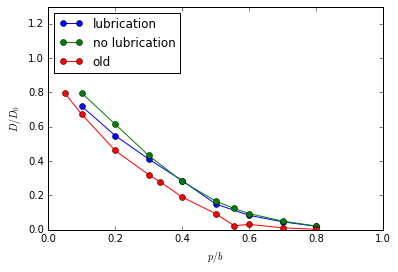

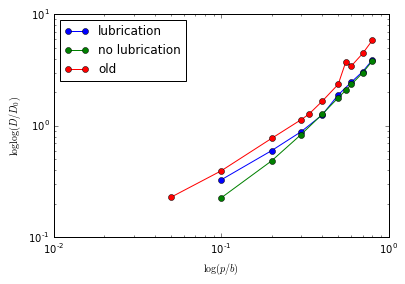

In [10]:
a=1
dataLub=getDop_a(a,trigger='steric')
datanL=getDop_a(a,trigger='noLub/steric')
dataoldLub=getDop_a(a,oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

## D over p vary aop

In [12]:
# get polymer system data for different n with noLub
def getDop_aop(aop,n=1,kop=0,u=0,trigger='',system='',oldLub=False):
    initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset/fitRPinv/"+system
    if oldLub==True:
        initfolder=root+"/Documents/workspace-cpp/SPS/Release/sim_data/noreset_oldLubBadg/fitRPinv/"+system
    b=10*n
    kstr='1.000' # needed in case of kop=0
    folder=initfolder
    data=[]
    if u!=0 and kop!=0:
        print("ERROR: if u!=0 you need to define kop!=0")
        return 
    if n==1: 
        folder+="/"+trigger+"/dt0.001/t200/"
    else: 
        if system=='':
            folder+="/test"
        folder+="/n"+str(n)+"/"+trigger+"/dt0.001/t200/"
    #print(folder)
    for adir in os.listdir(folder): 
        if "DS" in adir: continue
        a=float(adir[1:])
        p=a/aop
        pstr='%s' % float('%g' % p)
        pstr=pstr.rstrip('0').rstrip(".")
        pdir='p'+pstr
        arel=(float(a)/10.)                 # make p value p/b
        prel=p/10.
        if kop!=0 and u!=0:
            k=kop*p
            kstr="{0:.3f}".format(k)
        file=os.path.join(folder,adir,'d0/b'+str(b),pdir,'k'+kstr+'/u'+str(u)+'/InstantValues/linear_fit_parametersMSD.txt')
        #print(file)
        if os.path.isfile(file):
            #print(file)
            with open(file, 'r') as fitf:
                m = (fitf.readline().split('m')[1]).split()[0]
            data.append([float(prel),float(m)]) #the [:-1] serves to cut the linebreak '\n' from the string m.
        #else: print("Error: File not found!\n"+str(file))
    return np.array(sorted(data))

## Get normal data for aop=0.5,1,2
# TODO:
- for the figure below, get the lubcutint=9 data for the newlub data (blue line), here I left out p=a=0.05b, since I would need to use a smaller timestep for that. Also, I forgot that I NEED TO INCLUDE STERIC interactions, otherwise it won"t be rods but adjacent spheres governing the steric interactions!!!!!!!!!
/Users/jh/Documents/Remote_PC/yoshi_scratch/HI/sim/Release/sim_data/newlub/noreset/fitRPinv/steric/dt0.001/t200
- ALSO INCLUDE STERIC: If larger lubcutint leads to better data for aop=1 --> re-record data for aop=2 and aop=0.5, too with larger lubcutint

In [25]:
aop=0.25
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLubnS=getDop_aop(aop,trigger='',system='')
dataLubster=getDop_aop(aop,trigger='steric',system='')
dataLJ1=getDop_aop(aop,trigger='LJ',system='')
#dataLJ05=getDop_aop(aop,trigger='test/epsilon0.5/LJ',system='')
dataLJ025=getDop_aop(aop,trigger='test/epsilon0.25/LJ',system='')

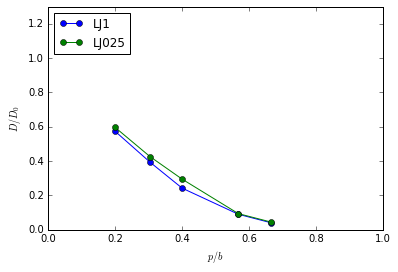

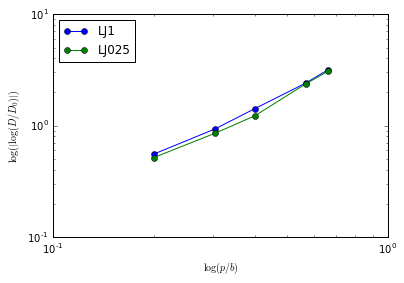

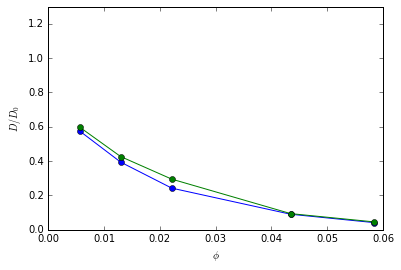

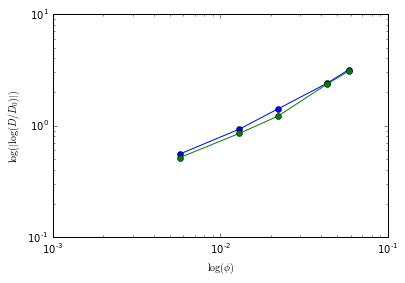

In [26]:
data=[dataLJ1]+[dataLJ025]
labels=['LJ1','LJ025']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels)
plotDoPhivarylub(aop,data,labels,loglog=True)

In [18]:
aop=0.5
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLubnS=getDop_aop(aop,trigger='',system='')
dataLubster=getDop_aop(aop,trigger='steric',system='')
dataLJ1=getDop_aop(aop,trigger='LJ',system='')
dataLJ05=getDop_aop(aop,trigger='test/epsilon0.5/LJ',system='')
dataLJ025=getDop_aop(aop,trigger='test/epsilon0.25/LJ',system='')

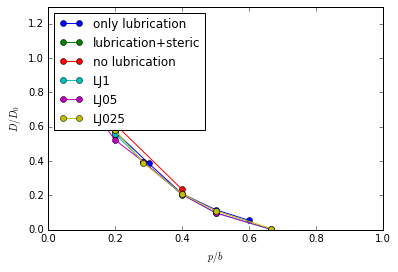

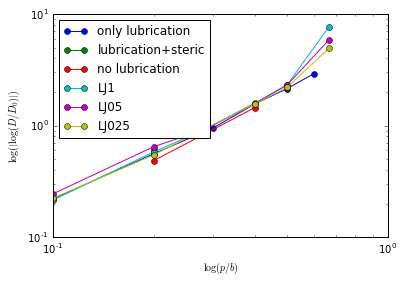

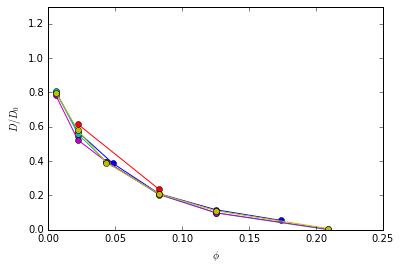

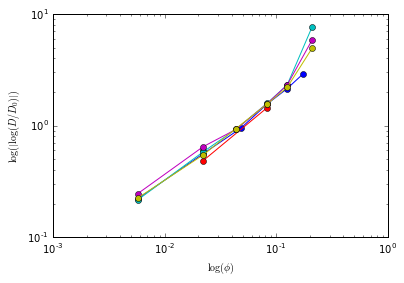

In [19]:

data=[dataLubnS]+[dataLubster]+[(datanL)]+[dataLJ1]+[dataLJ05]+[dataLJ025]
labels=['only lubrication','lubrication+steric','no lubrication','LJ1','LJ05','LJ025']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels)
plotDoPhivarylub(aop,data,labels,loglog=True)

# TODO D over phi v U_0
* I need to record D over phi data with different U_0. For this I need to implement kop in the submit script. Evaluate it as below:

In [ ]:
aop=0.5;kop=1;uarr=[-10,-5,0,10,20]
data=[]
for u in arr:
    data.append(getDop_aop(aop,kop,u,trigger='LJ',system=''))
labels = [r'$U_0/k_BT =$'+str(u) for u in arr]
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels)
plotDoPhivarylub(aop,data,labels,loglog=True)


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
# OLD STUFF
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

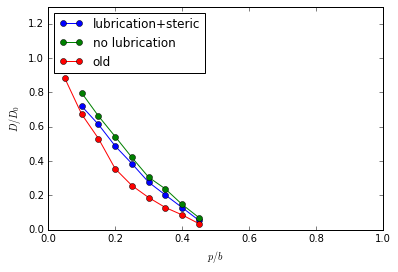

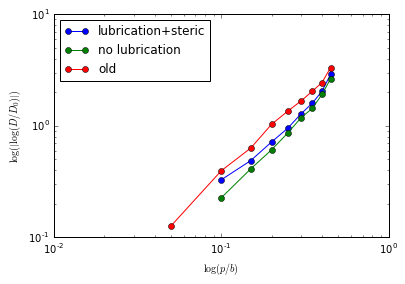

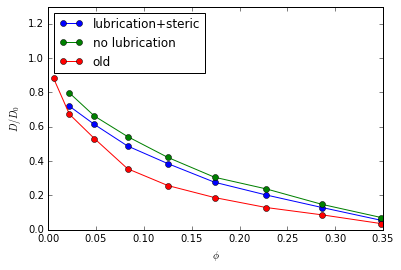

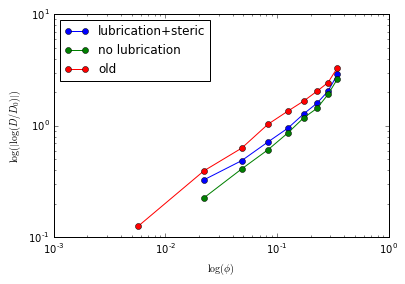

In [29]:
aop=1
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLubster=getDop_aop(aop,trigger='steric',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLubster]+[(datanL)]+[dataoldLub]
labels=['lubrication+steric','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)
plotDoPhivarylub(aop,data,labels)
plotDoPhivarylub(aop,data,labels,loglog=True)

#### Conclusion:
- For the reasons given below; My model only serves as a useful approximation, for small aop, i.e. when the polymer chain diameter is smaller than the particle radius. Otherwise, approximating the cylinder with adjacent spheres leads to bad results.
- With lubrication we do not really see a stretched exp anymore.
- When comparing my data to Phillips1990 I see that at large $\phi$ lubrication effects become stronger, in accordance to Phillips data. Here, in contrast, lubrication effects seem to be strongest for small $\phi$. This occurs, since at small $\phi$, i.e. small $a$ and small $p$, the cylinders along the edge of the simulation box are modeled using more beads, which leads to a stronger hindrance effect due to lubrication. This counter-intuitive behavior is an artifact that stems from approximating the cylinder HI with adjacent spheres, which leads to an incorrect lubrication, since there are no lubrication effects close to the cylinder surface on most points of the surface between two beads.

In [ ]:
aop=2
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLub=getDop_aop(aop,trigger='steric',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

In [ ]:
aop=0.5
datanL=getDop_aop(aop,trigger='noLub/steric',system='')
dataLub=getDop_aop(aop,trigger='steric',system='')
dataoldLub=getDop_aop(aop,trigger='',system='',oldLub=True)
data=[dataLub]+[(datanL)]+[dataoldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(data,labels)
plotDopvarylub(data,labels,loglog=True)

### Single Monomer Systems

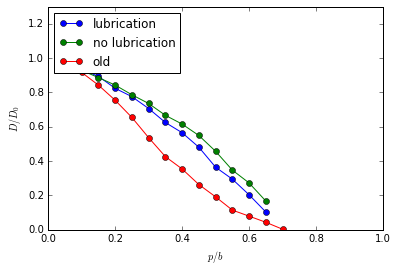

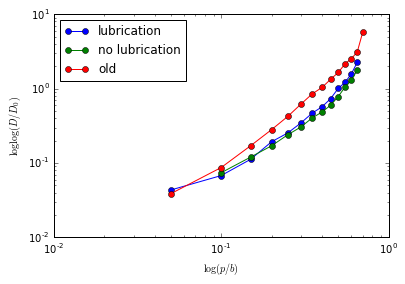

In [19]:
# Get SS W=3 data
aop=1
W=3
dataSSW3nL=getDop_aop(aop,W,trigger='noLub/steric',system='test/EwaldTest1')
dataSSW3Lub=getDop_aop(aop,W,trigger='',system='test/EwaldTest1')
dataSSW3oldLub=getDop_aop(aop,W,trigger='',system='test/EwaldTest1',oldLub=True)
dataSSW3=[dataSSW3Lub]+[(dataSSW3nL)]+[dataSSW3oldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(dataSSW3,labels)
plotDopvarylub(dataSSW3,labels,loglog=True)

### Conclusion:
I find that it's important that lubcutint is large enough. I should use a value of 9. Alternatively, I should use a value that does not depend so much on the diameters $a$ and $p$. Otherwise, the lines will not be smooth for D over p data

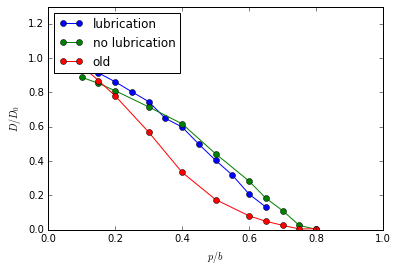

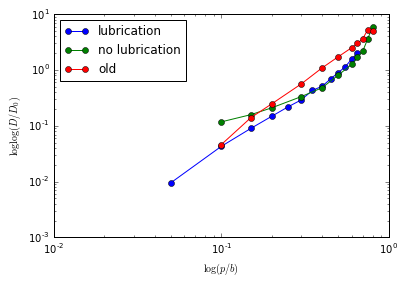

In [103]:
# Get ranS W=4 data
aop=1
W=4
dataranSW4nL=getDop_aop(aop,W,trigger='noLub/steric',system='ranSpheres/test/EwaldTest1')
dataranSW4Lub=getDop_aop(aop,W,trigger='',system='ranSpheres/test/EwaldTest1')
dataranSW4oldLub=getDop_aop(aop,W,trigger='',system='ranSpheres/test/EwaldTest1',oldLub=True)
dataranSW4=[dataranSW4Lub]+[(dataranSW4nL)]+[dataranSW4oldLub]
labels=['lubrication','no lubrication','old']
plotDopvarylub(dataranSW4,labels)
plotDopvarylub(dataranSW4,labels,loglog=True)

### Conclusion:
It appears that the lubrication effect is very much reduced here and we do not really see a clear stretched exp anymore. This *might* be partly due to using a shorter lubrication cutoff. Hence, I am re-running the SSW3 simulation on yoshi with lubcutint=9.
- TODO SS lubcutint=9 this must be evaluated on yoshi - YES, It improves it (For SS we see lubcutint=9 data)

## CONCLUSION FOR ALL SINGLE MONOMER SYSTEMS
- Leave out the noLub plot for SS and plot the lubcutint=9 data for SS together with the lub and nolub data for ranS. This will show, that SS and ranSnoLub do not lead to a stretched exp, but ranS with lub does so. Hence, both lub AND the structure are important!

In [18]:
for a in range(1,5):
    print('a =',a,":  10%a =",10%a)

a = 1 :  10%a = 0
a = 2 :  10%a = 0
a = 3 :  10%a = 1
a = 4 :  10%a = 2
